In [1]:
import xfirst

Welcome to JupyROOT 6.28/04


### Config cuts and figures

In [2]:
cut = xfirst.config.cuts.A1
features = xfirst.profile_functions.usp().parameter_names
target = 'Xfirst'
nshowers = 100000

### Load normalized data

In [3]:
train, validation, test, mean, std = xfirst.data.load_fits(
  'data',
  cut = cut,
  drop_bad = True,
  xfirst = True,
  norm = features,
  nshowers = nshowers
)

### Train the gradient boosting regressor

In [4]:
regressor = xfirst.models.gradient_boosting_regressor().fit(
  train = (train[features], train[target]),
  validation = (validation[features], validation[target]),
)

[0]	validation_0-rmse:29.27840	validation_1-rmse:29.33194
[1]	validation_0-rmse:24.23378	validation_1-rmse:24.33572
[2]	validation_0-rmse:21.13516	validation_1-rmse:21.26842
[3]	validation_0-rmse:19.24618	validation_1-rmse:19.41927
[4]	validation_0-rmse:18.10166	validation_1-rmse:18.29353
[5]	validation_0-rmse:17.42685	validation_1-rmse:17.62955
[6]	validation_0-rmse:17.01091	validation_1-rmse:17.22791
[7]	validation_0-rmse:16.72899	validation_1-rmse:16.95617
[8]	validation_0-rmse:16.56485	validation_1-rmse:16.80093
[9]	validation_0-rmse:16.44799	validation_1-rmse:16.69384
[10]	validation_0-rmse:16.36046	validation_1-rmse:16.61897
[11]	validation_0-rmse:16.30436	validation_1-rmse:16.56988
[12]	validation_0-rmse:16.26438	validation_1-rmse:16.53691
[13]	validation_0-rmse:16.22718	validation_1-rmse:16.50566
[14]	validation_0-rmse:16.19840	validation_1-rmse:16.48701
[15]	validation_0-rmse:16.17379	validation_1-rmse:16.46863
[16]	validation_0-rmse:16.15365	validation_1-rmse:16.45557
[17]	va

### Validation curve

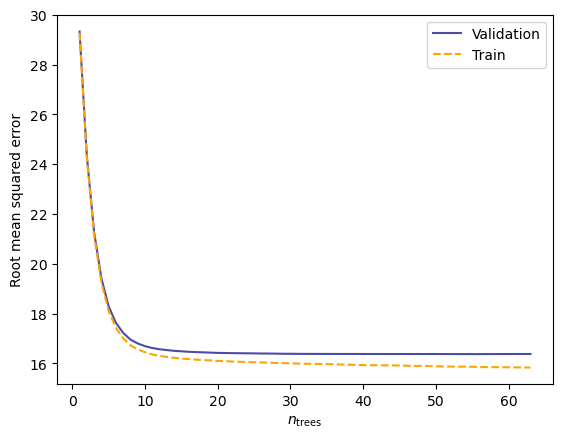

In [5]:
fig = regressor.draw()

### Compute predictions

In [6]:
results = regressor.test(test[features], test[target])
results['lgE'] = test['lgE']
results

predictions      target  residuals        lgE
particle id                                                  
p        0        29.499403   21.829575   7.669828  18.407814
         1       212.670166  272.238708 -59.568542  17.403774
         2        84.914139  112.972229 -28.058090  18.852810
         3        51.029053   61.754780 -10.725727  19.517765
         4        11.715038    8.127032   3.588006  19.965719
...                     ...         ...        ...        ...
Fe       99994     8.735871    2.617721   6.118151  18.258747
         99995    22.476950   14.076412   8.400537  18.783052
         99996     7.498789    4.322517   3.176272  19.556328
         99997    11.723376    7.673835   4.049541  18.366446
         99999    10.073457   17.975107  -7.901650  18.451544

[477611 rows x 4 columns]

### Draw predictions

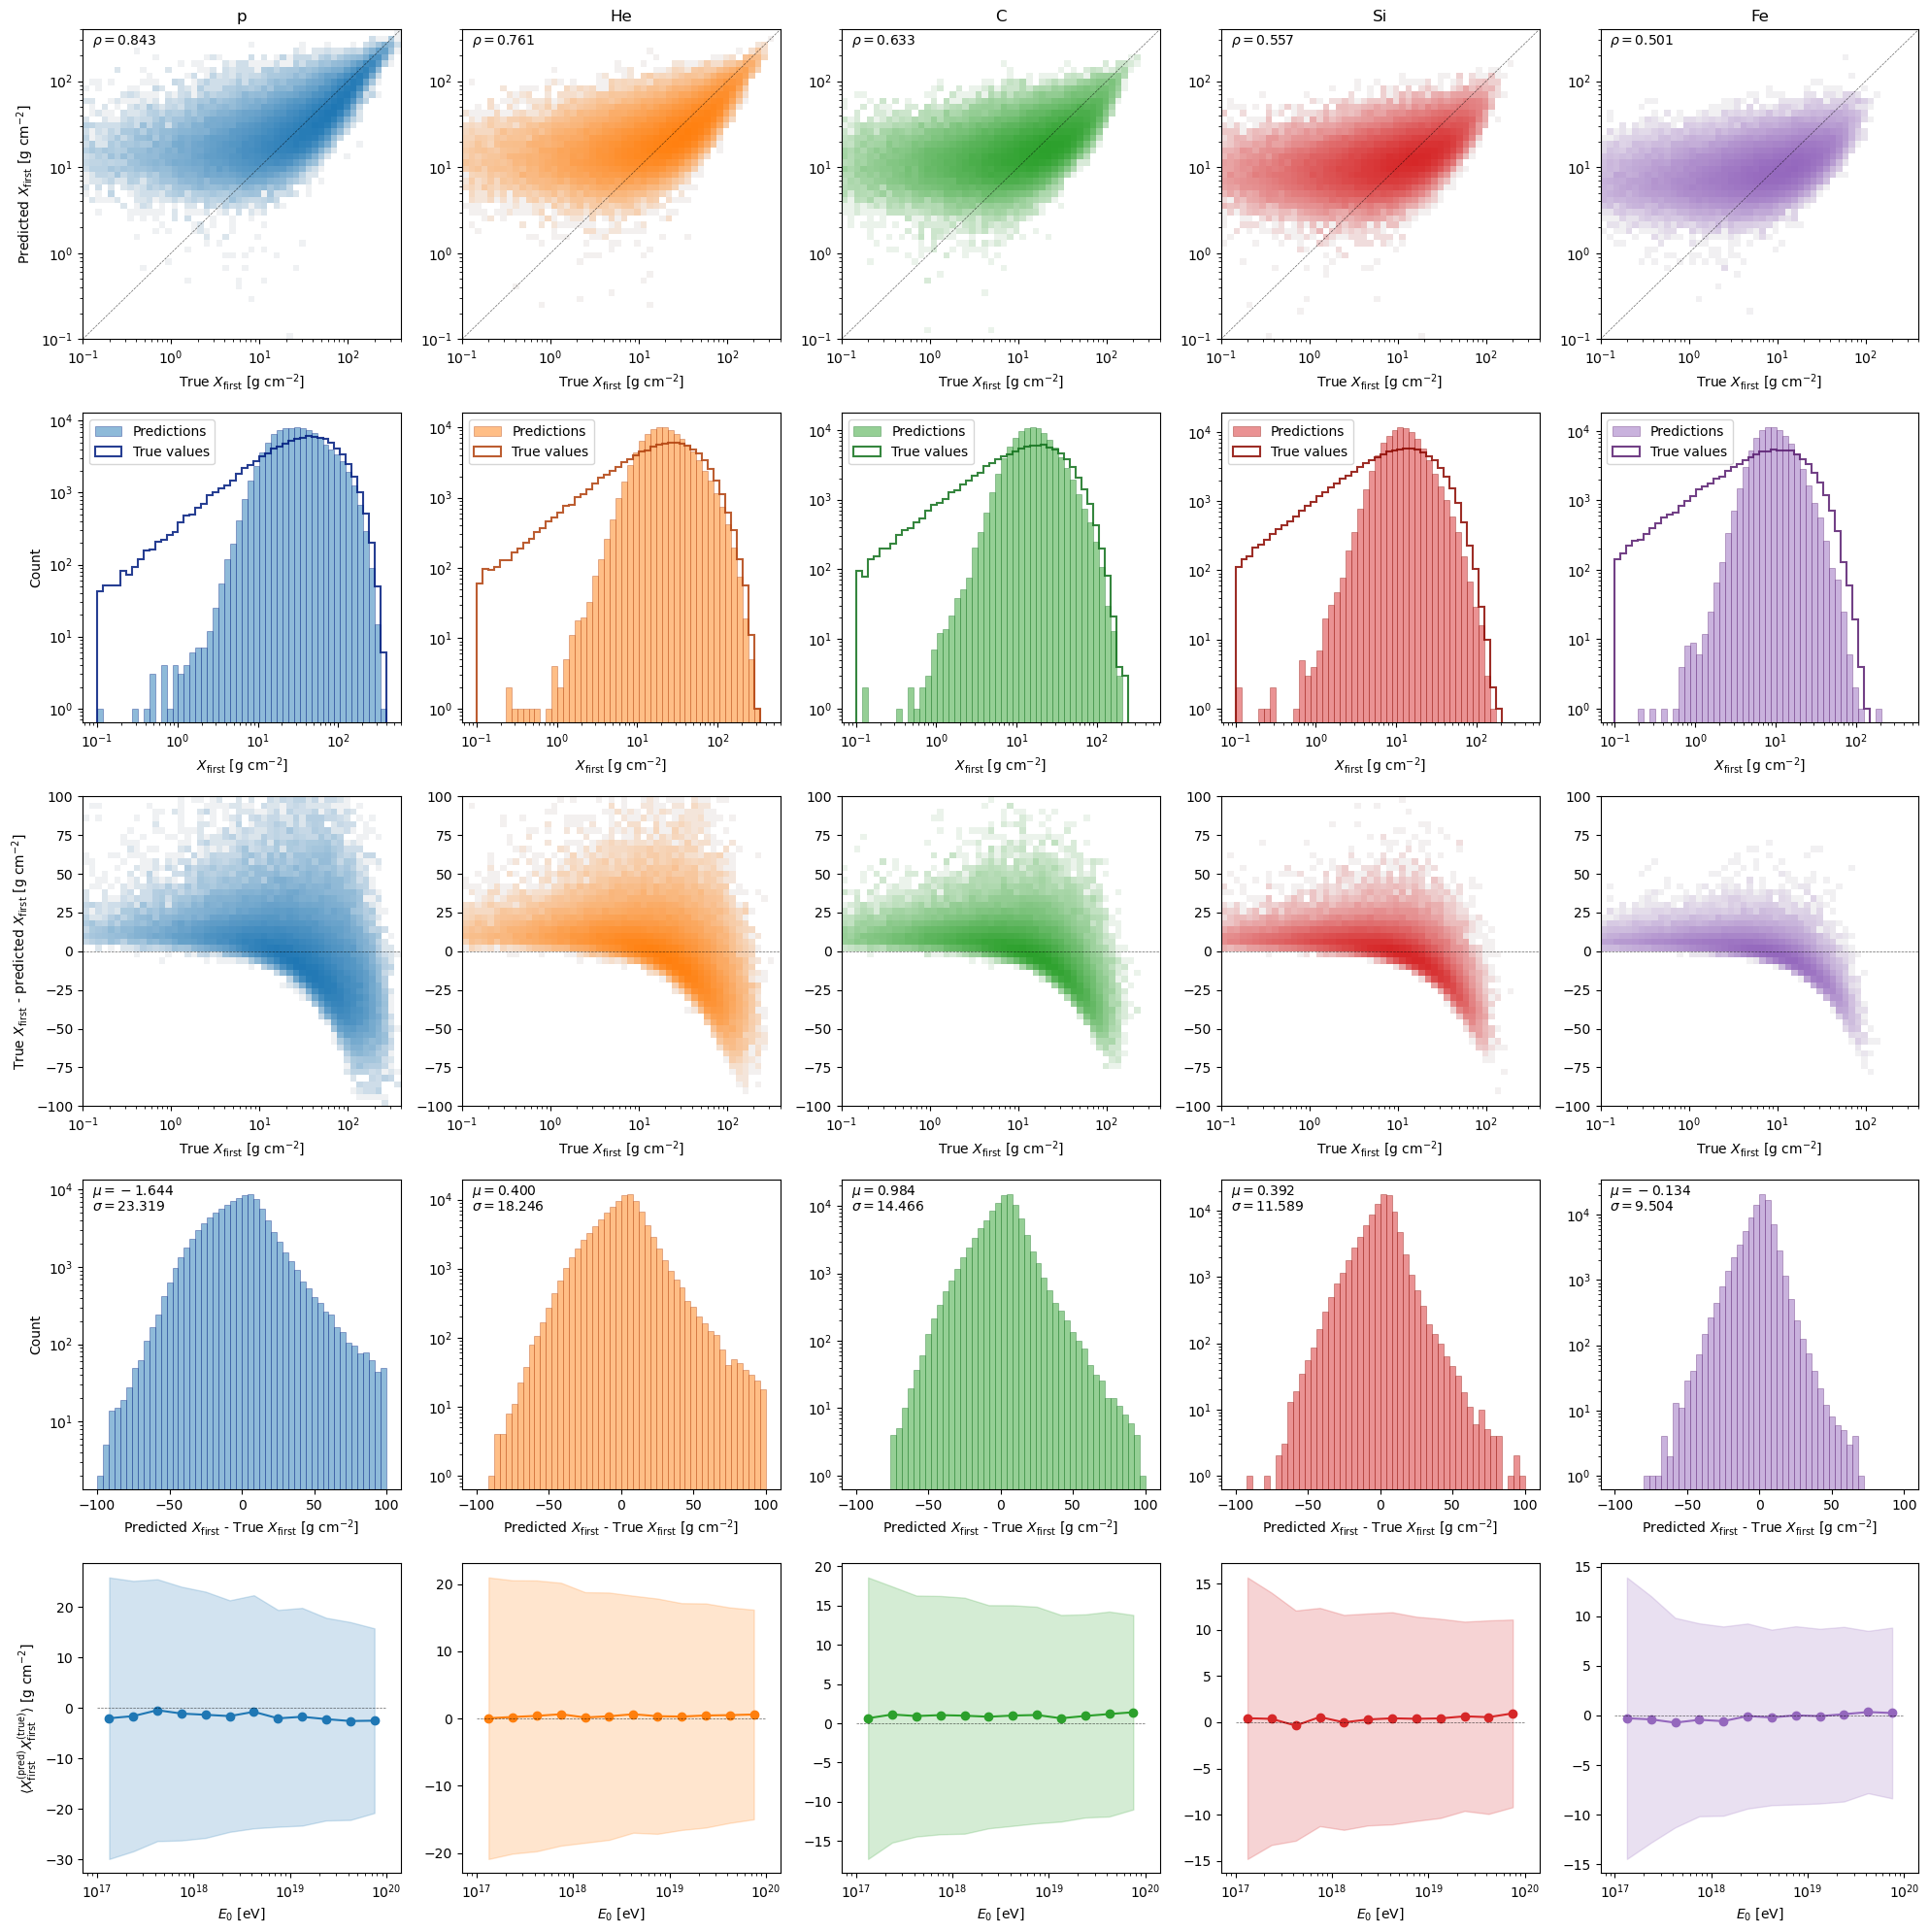

In [7]:
fig = xfirst.viz.draw_predictions(results)